In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

First of all, drop customerID column as it is of no use

In [8]:
df.drop('customerID',axis='columns',inplace=True)

In [9]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
for col in df.columns:
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges']:
        print(f"{col}: {df[col].unique()}")
        print("--"*20)

gender: ['Female' 'Male']
----------------------------------------
SeniorCitizen: [0 1]
----------------------------------------
Partner: ['Yes' 'No']
----------------------------------------
Dependents: ['No' 'Yes']
----------------------------------------
PhoneService: ['No' 'Yes']
----------------------------------------
MultipleLines: ['No phone service' 'No' 'Yes']
----------------------------------------
InternetService: ['DSL' 'Fiber optic' 'No']
----------------------------------------
OnlineSecurity: ['No' 'Yes' 'No internet service']
----------------------------------------
OnlineBackup: ['Yes' 'No' 'No internet service']
----------------------------------------
DeviceProtection: ['No' 'Yes' 'No internet service']
----------------------------------------
TechSupport: ['No' 'Yes' 'No internet service']
----------------------------------------
StreamingTV: ['No' 'Yes' 'No internet service']
----------------------------------------
StreamingMovies: ['No' 'Yes' 'No internet servi

for col in df.columns:
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges']:
        print(f"{col}: {df[col].value_counts()}")
        print("--"*20)

In [12]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    print(f"""{col}: {len(df[df[col]==" "])}""")
    print("--"*20)
    

tenure: 0
----------------------------------------
MonthlyCharges: 0
----------------------------------------
TotalCharges: 11
----------------------------------------


In [13]:
len(df[df["TotalCharges"]==" "])

11

In [14]:
df["TotalCharges"]=df["TotalCharges"].replace(" ",0.0).astype(float)

In [15]:
df["TotalCharges"].dtype

dtype('float64')

In [16]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [17]:
def plot_distribution(df,column_name):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column_name], kde = True)
    plt.title(f"Distribution of {column_name}")
    
    plt.subplot(1, 2, 2)
    sns.boxplot(y  = df[column_name])
    plt.title(f"Boxplot of {column_name}")
    plt.show()

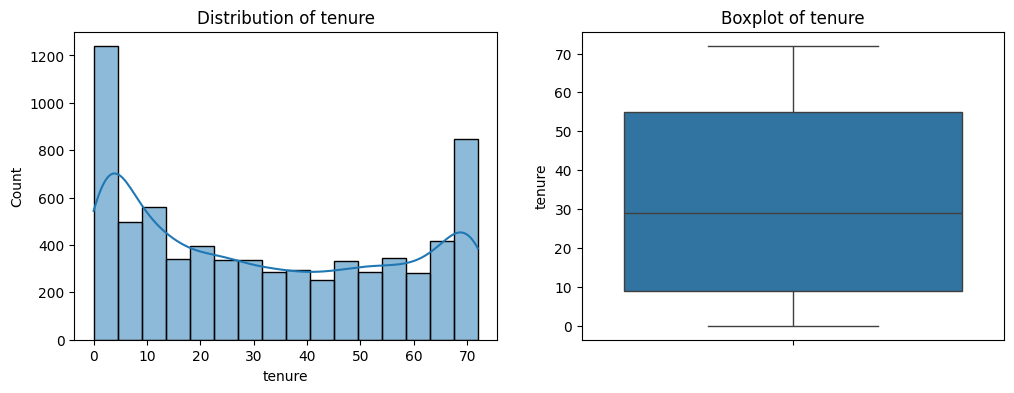

In [18]:
plot_distribution(df, "tenure")

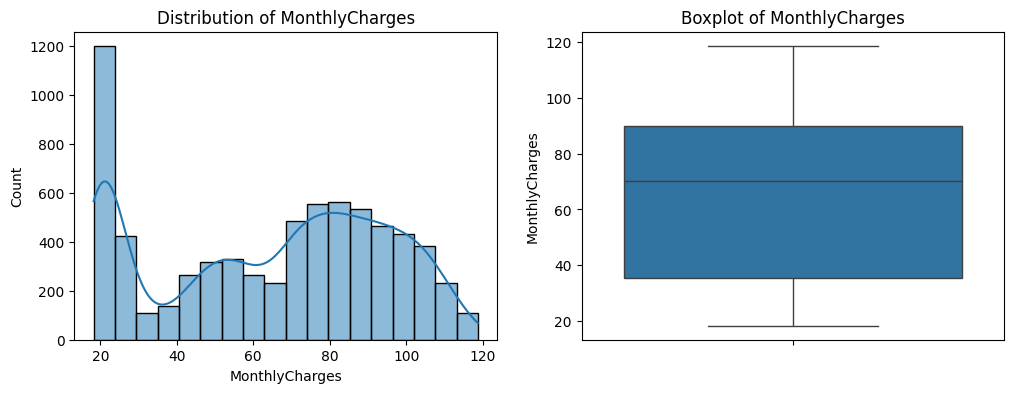

In [19]:
plot_distribution(df, "MonthlyCharges")

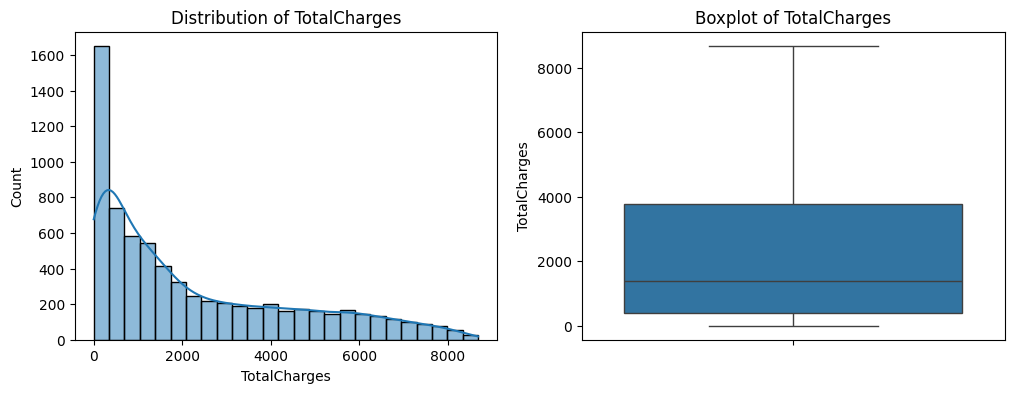

In [20]:
plot_distribution(df, "TotalCharges")

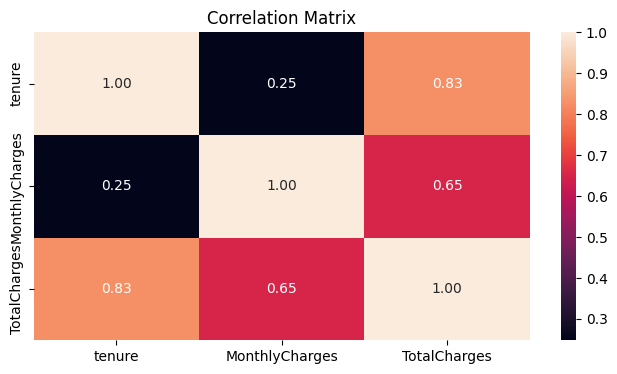

In [21]:
plt.figure(figsize = (8, 4))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True,  fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

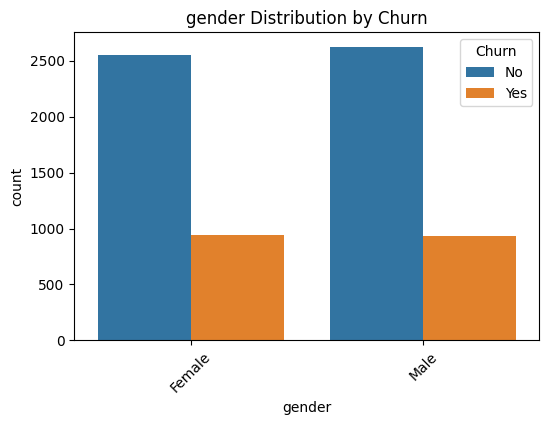

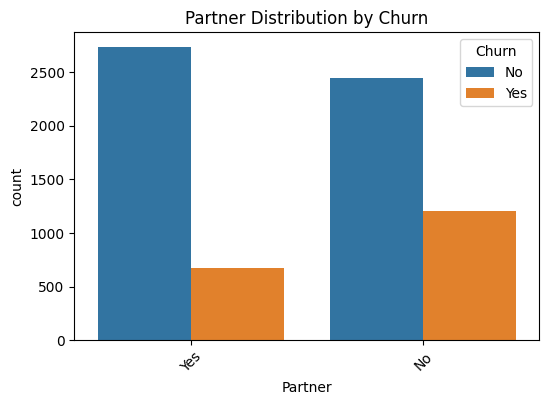

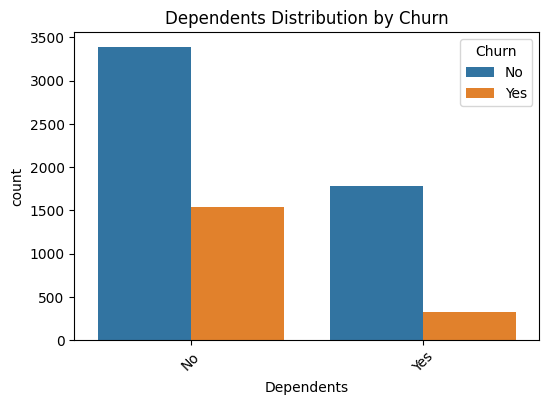

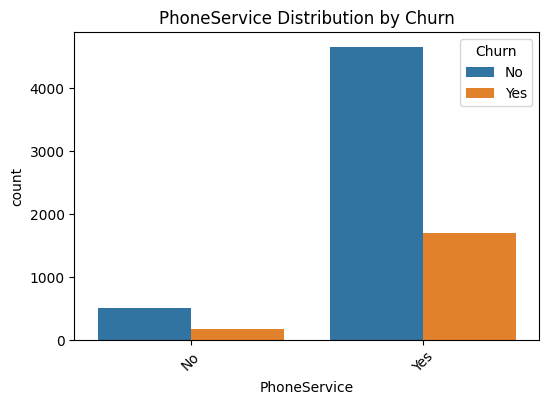

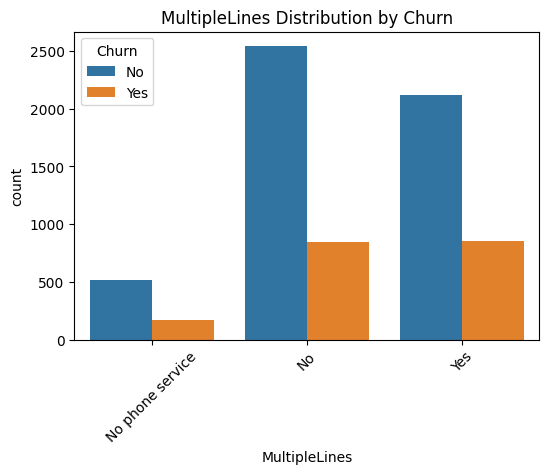

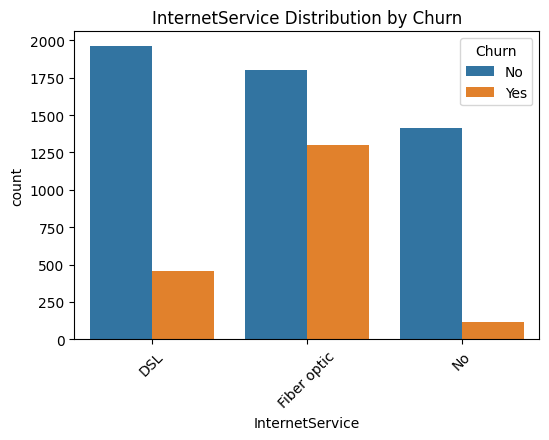

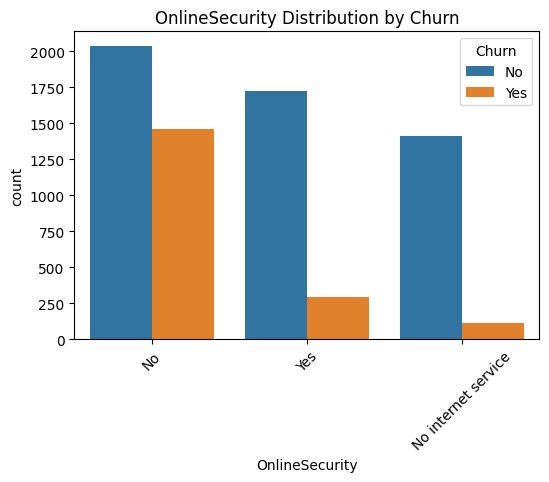

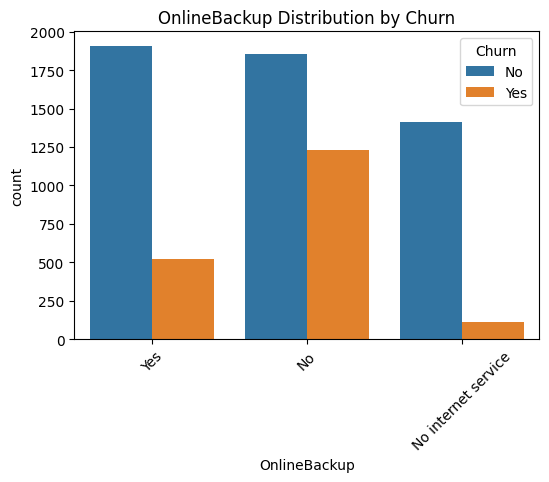

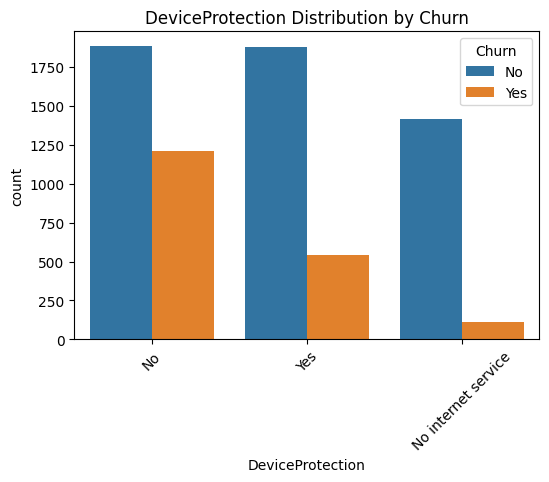

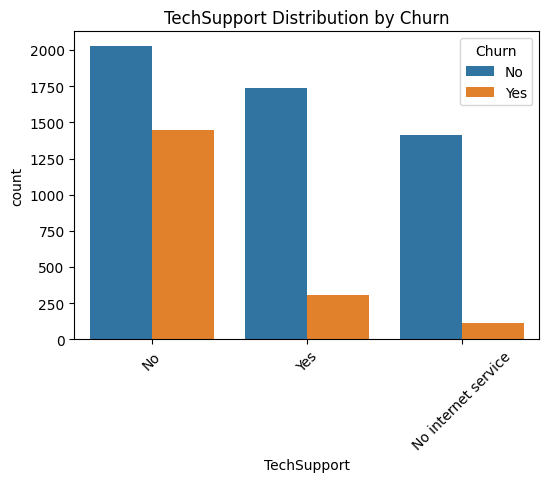

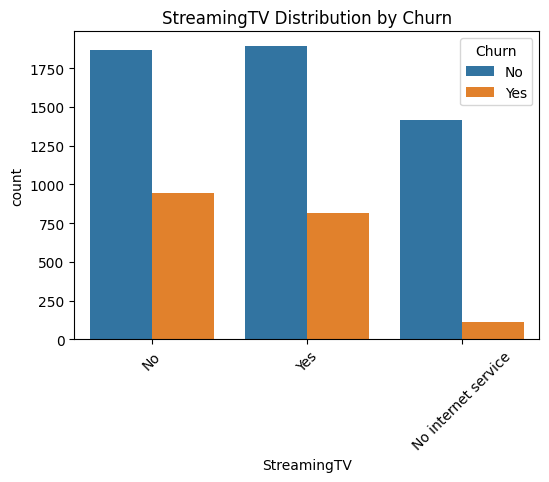

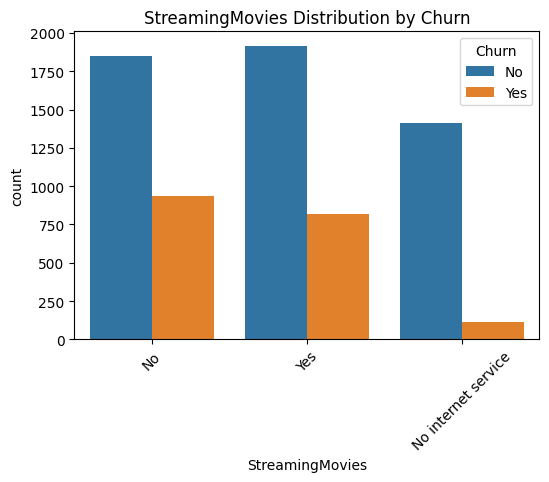

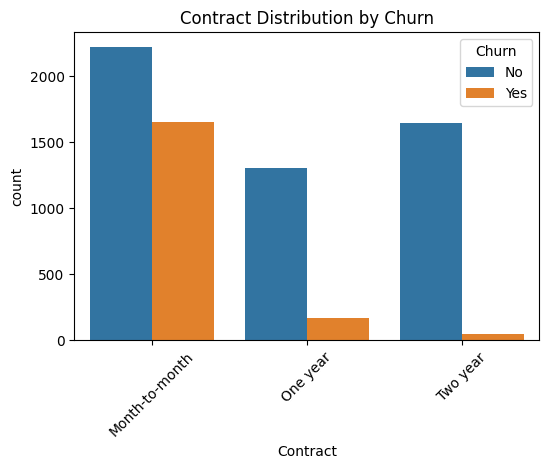

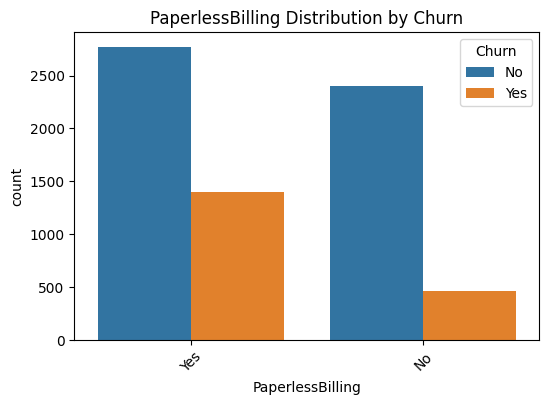

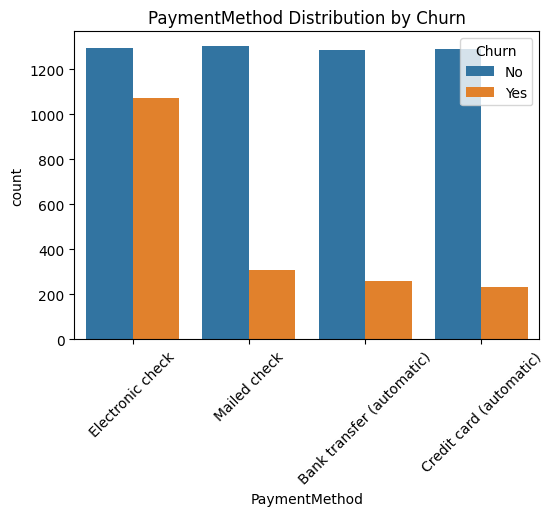

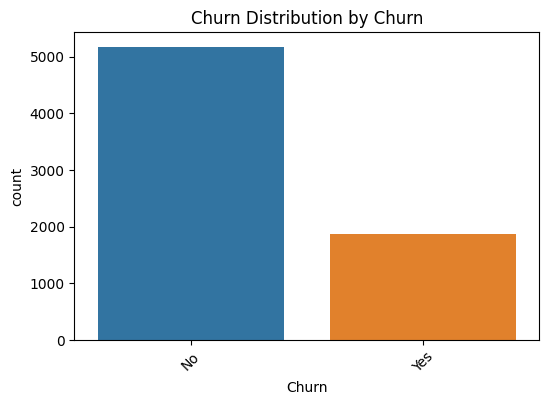

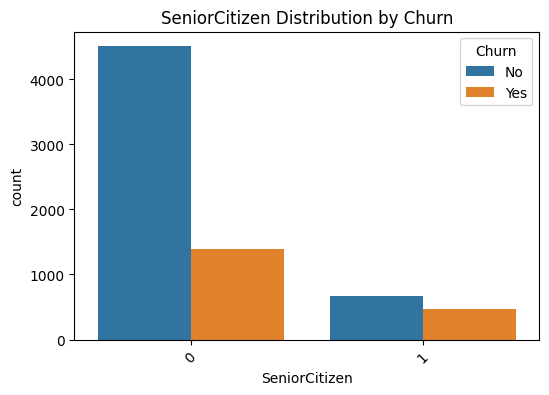

In [24]:
categorical_cols = df.select_dtypes(include = "object").columns.to_list() + ['SeniorCitizen']

for col in categorical_cols:
    plt.figure(figsize = (6, 4))
    sns.countplot(data = df, x = df[col], hue = 'Churn')
    plt.title(f"{col} Distribution by Churn")
    plt.xticks(rotation=45)
    plt.show()

Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [25]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [26]:
for col in df.columns:
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges']:
        print(f"{col}: {df[col].unique()}")
        print("--"*20)

gender: ['Female' 'Male']
----------------------------------------
SeniorCitizen: [0 1]
----------------------------------------
Partner: ['Yes' 'No']
----------------------------------------
Dependents: ['No' 'Yes']
----------------------------------------
PhoneService: ['No' 'Yes']
----------------------------------------
MultipleLines: ['No' 'Yes']
----------------------------------------
InternetService: ['DSL' 'Fiber optic' 'No']
----------------------------------------
OnlineSecurity: ['No' 'Yes']
----------------------------------------
OnlineBackup: ['Yes' 'No']
----------------------------------------
DeviceProtection: ['No' 'Yes']
----------------------------------------
TechSupport: ['No' 'Yes']
----------------------------------------
StreamingTV: ['No' 'Yes']
----------------------------------------
StreamingMovies: ['No' 'Yes']
----------------------------------------
Contract: ['Month-to-month' 'One year' 'Two year']
----------------------------------------
PaperlessBill

Convert Yes and No to 1 or 0

In [27]:
yes_no_col=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_col:
    df[col].replace({"Yes":1,"No":0},inplace=True)

C:\Users\SNEHANGSHU\AppData\Local\Temp\ipykernel_15060\1791636892.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({"Yes":1,"No":0},inplace=True)
C:\Users\SNEHANGSHU\AppData\Local\Temp\ipykernel_15060\1791636892.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].replace({

In [28]:
for col in yes_no_col:
    print(f'{col}: {df[col].unique()}')

Partner: [1 0]
Dependents: [0 1]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
Churn: [0 1]


In [29]:
df["gender"]=df["gender"].replace({"Female":0,"Male":1})

C:\Users\SNEHANGSHU\AppData\Local\Temp\ipykernel_15060\3571681466.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["gender"]=df["gender"].replace({"Female":0,"Male":1})


In [30]:
df["gender"]

0       0
1       1
2       1
3       1
4       0
       ..
7038    1
7039    0
7040    0
7041    1
7042    1
Name: gender, Length: 7043, dtype: int64

In [31]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [32]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [33]:
objects_columns = df.select_dtypes(include = "object").columns

In [34]:
objects_columns

Index(['InternetService', 'Contract', 'PaymentMethod'], dtype='object')

In [35]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

for col in objects_columns:
    df[col] = encoder.fit_transform(df[col])


In [36]:
for col in objects_columns:
    print(f'{col}: {df[col].unique()}')

InternetService: [0 1 2]
Contract: [0 1 2]
PaymentMethod: [2 3 0 1]


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [38]:
df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [127]:
print(df.head().to_string())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn
0       0              0        1           0       1             0              0                0               0             1                 0            0            0                0         0                 1              2           29.85         29.85      0
1       1              0        0           0      34             1              0                0               1             0                 1            0            0                0         1                 0              3           56.95       1889.50      0
2       1              0        0           0       2             1              0                0               1             1                 0            0            0              

In [123]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

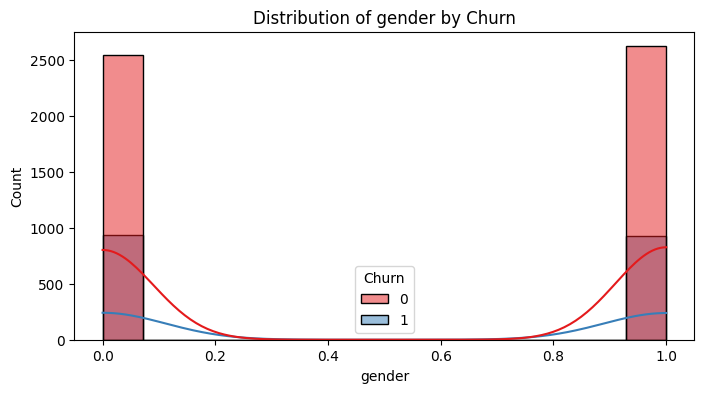

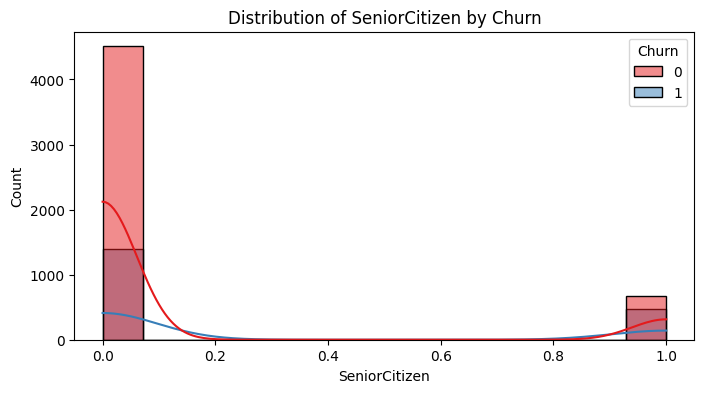

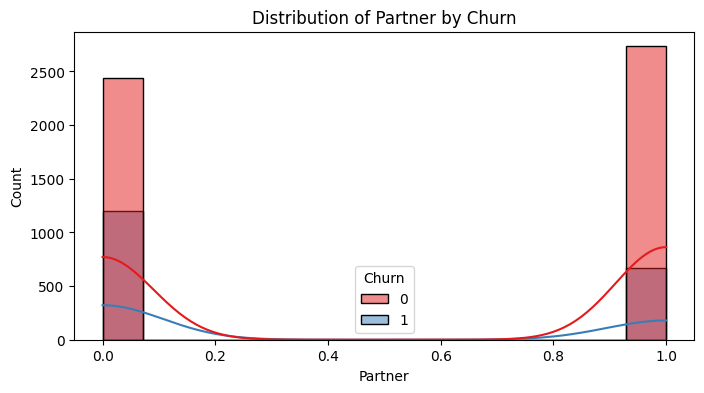

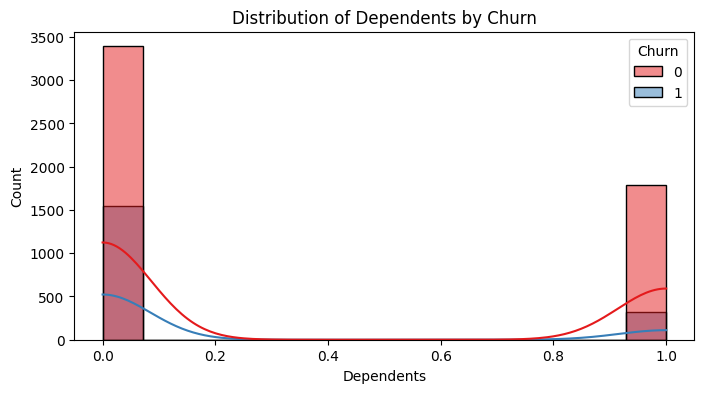

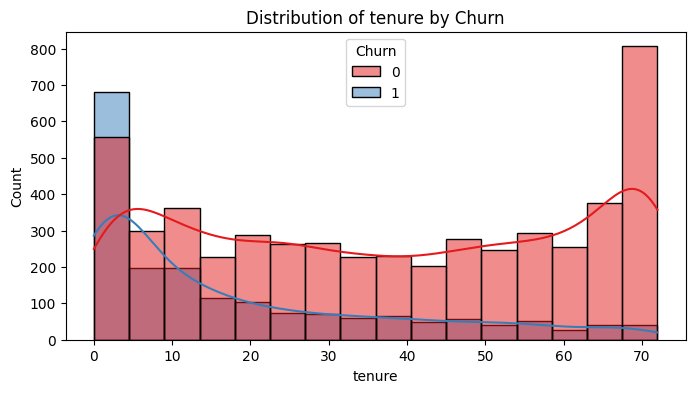

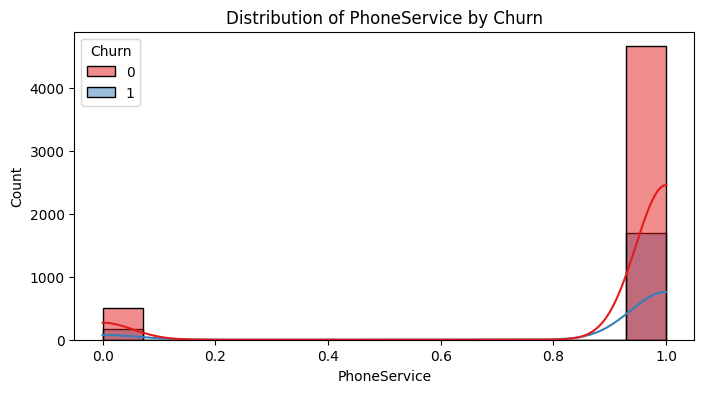

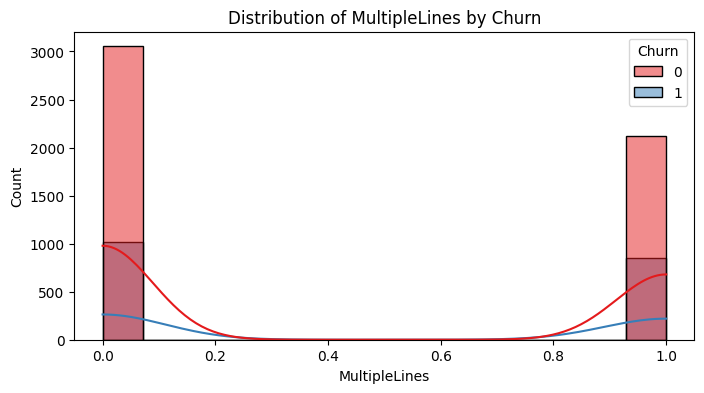

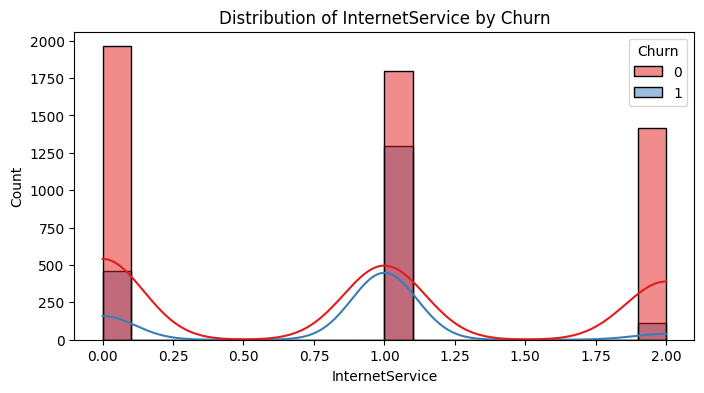

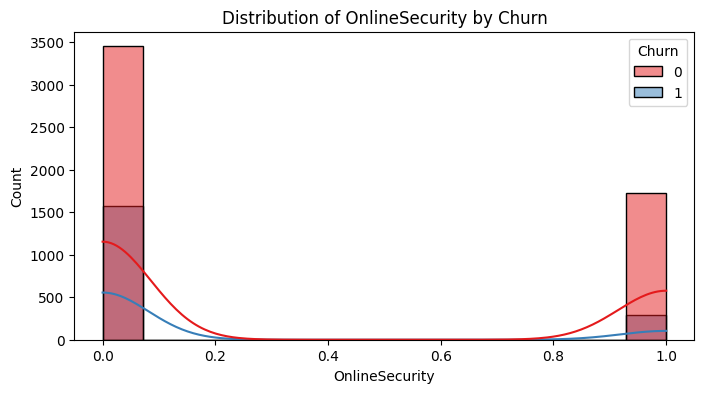

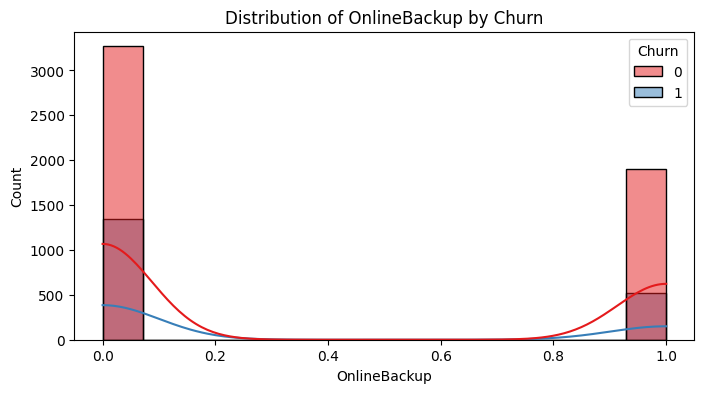

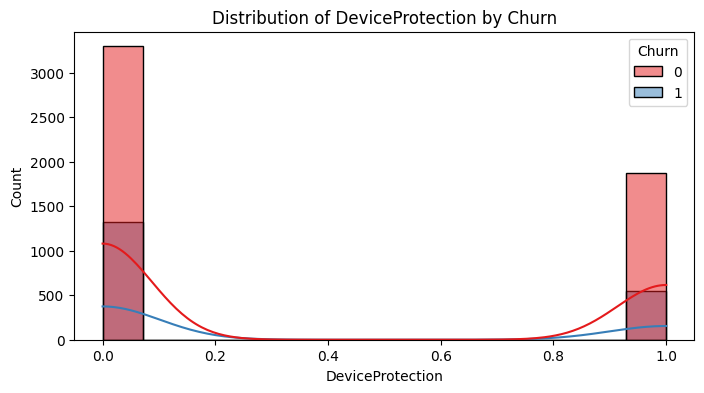

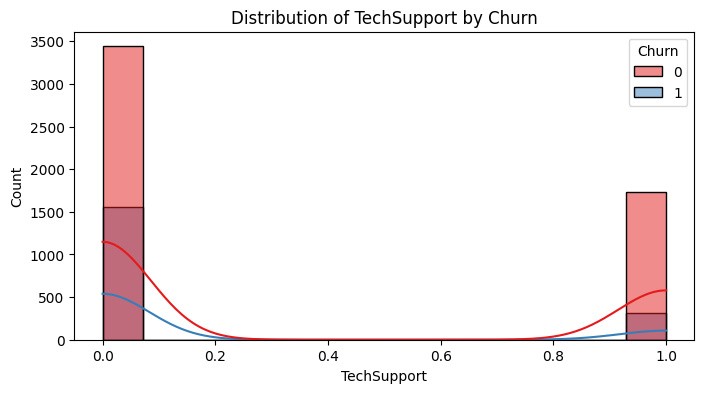

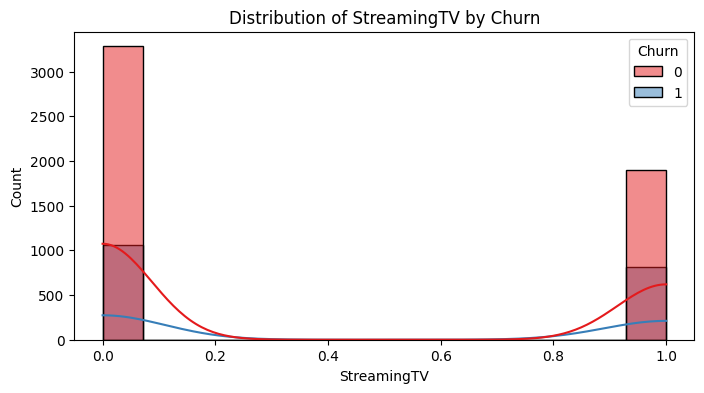

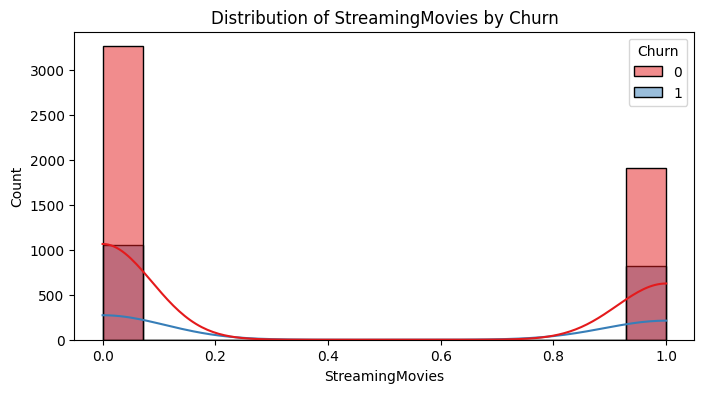

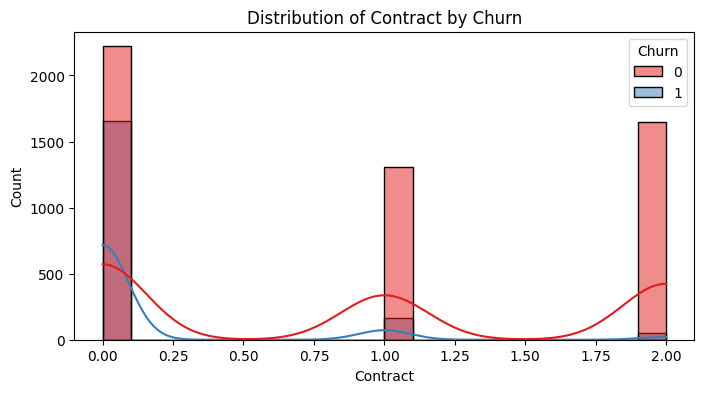

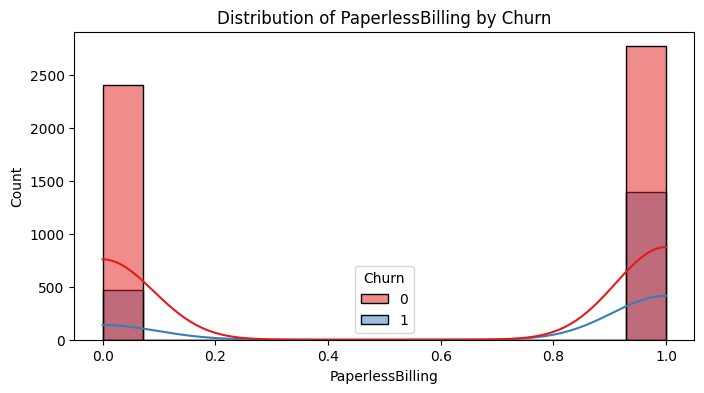

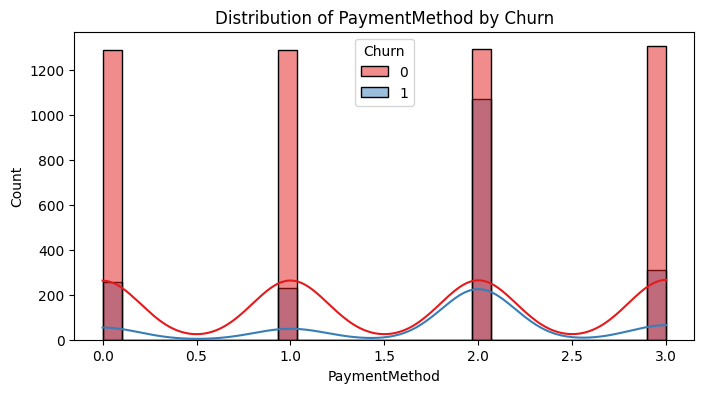

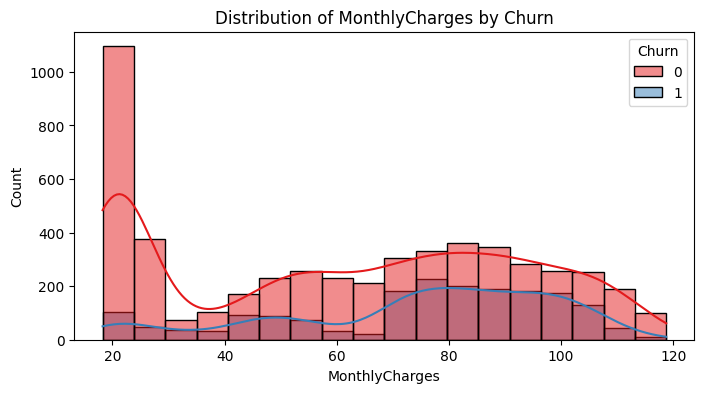

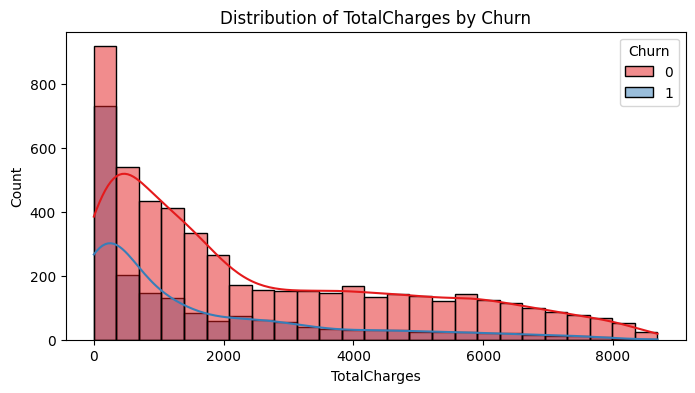

In [128]:
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]) and col != "Churn":  # avoid plotting hue column itself
        plt.figure(figsize=(8, 4))
        sns.histplot(data=df, x=col, kde=True, hue="Churn", palette="Set1")
        plt.title(f'Distribution of {col} by Churn')
        plt.show()

In [133]:

# Continuous columns
continuous_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Apply log1p transformation
df[continuous_cols] = df[continuous_cols].apply(lambda x: np.log1p(x))

# Check result
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,NaN,0,0,0,0,1,0,0,0,0,0,1,2,NaN,NaN,0
1,1,0,0,0,0.260212,1,0,0,1,0,1,0,0,0,1,0,3,-0.273768,0.226984,0
2,1,0,0,0,NaN,1,0,0,1,1,0,0,0,0,0,1,3,-0.419562,NaN,1
3,1,0,0,0,0.498547,0,0,0,1,0,1,1,0,0,1,0,0,-1.313337,0.210105,0
4,0,0,0,0,NaN,1,0,1,0,0,0,0,0,0,0,1,2,0.193546,NaN,1


In [135]:
df.isnull().sum()

gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure              1612
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges      1716
TotalCharges        1387
Churn                  0
dtype: int64

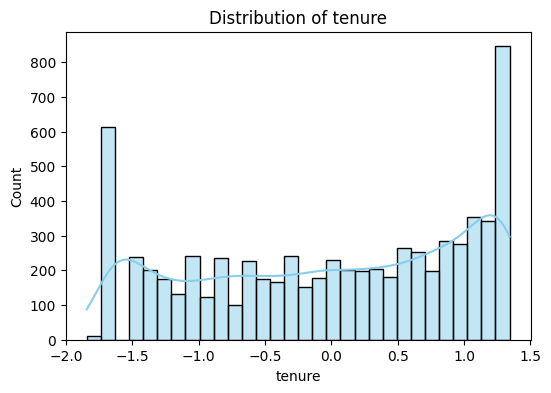

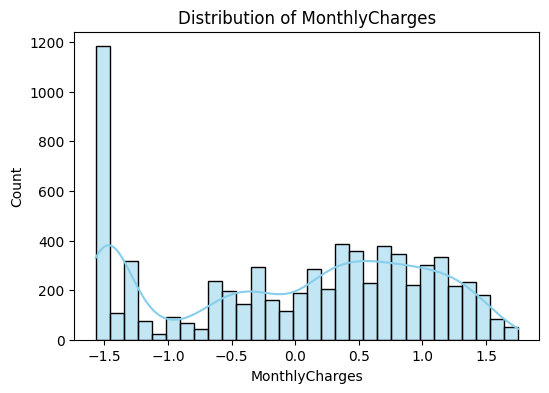

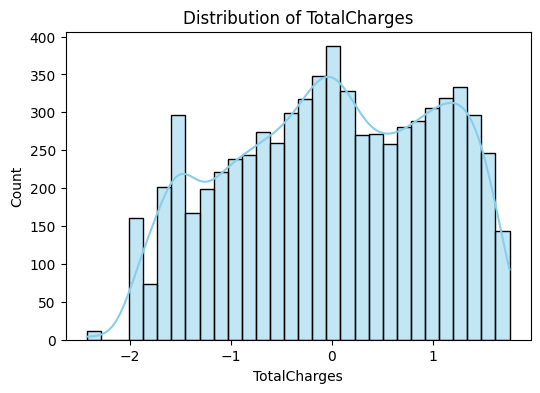

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select all numeric columns except the target
numeric_cols = df.select_dtypes(include=float).columns
numeric_cols = [col for col in numeric_cols if col != 'Churn']

# Plot histograms
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()


Here we can see that that catagorical features is imbalanced, for this when we fit any model that is biased towrards 0 . so we need to fix this imbalance , for this we use SMOTE - Synthetic Minority Over-sampling Technique

In [39]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [40]:
X = df.drop(columns = ['Churn'])
y = df['Churn']

Train test split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [53]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6607,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,2,25.30,25.30
2598,0,0,0,0,7,1,0,1,0,0,1,0,0,0,0,1,2,75.15,525.00
2345,0,0,0,1,4,1,0,2,0,0,0,0,0,0,0,1,0,20.05,85.50
4093,0,0,0,0,29,1,1,1,0,0,0,0,0,0,0,1,1,76.00,2215.25
693,0,0,0,0,3,1,1,1,0,0,0,0,0,0,0,1,1,75.10,270.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0,1,0,1,1,0,1,1,0,0,0,1,1,0,1,2,95.00,95.00
5191,0,0,1,1,23,1,1,0,1,1,1,1,1,1,2,1,1,91.10,2198.30
5226,1,0,1,1,12,1,0,2,0,0,0,0,0,0,0,1,2,21.15,306.05
5390,1,1,0,0,12,1,1,1,0,0,1,0,1,1,0,1,2,99.45,1200.15


In [54]:
y_train

6607    1
2598    0
2345    0
4093    0
693     1
       ..
3772    1
5191    0
5226    0
5390    1
860     0
Name: Churn, Length: 5282, dtype: int64

In [42]:
y_train.value_counts()

Churn
0    3892
1    1390
Name: count, dtype: int64

In [56]:
Oversample = SMOTE()

In [57]:
X_train_smote, y_train_smote = Oversample.fit_resample(X_train, y_train)

In [119]:
y_train_smote.value_counts()

Churn
1    3892
0    3892
Name: count, dtype: int64